<a href="https://colab.research.google.com/github/elenaguoyuetong/ML-Lab/blob/main/Sec_1_Homework_8_Bagging%26Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.) Import and Clean data

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [4]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [5]:
df = pd.read_csv("/content/gdrive/MyDrive/bank-additional-full.csv", sep=';')

In [9]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df = df.drop(["default", "pdays",	"previous",	"poutcome",	"emp.var.rate",	"cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"], axis = 1)
df = pd.get_dummies(df, columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"], drop_first = True)


In [7]:
df.head()

,age,duration,y,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,no,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,57,149,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,37,226,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,40,151,no,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,56,307,no,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [8]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

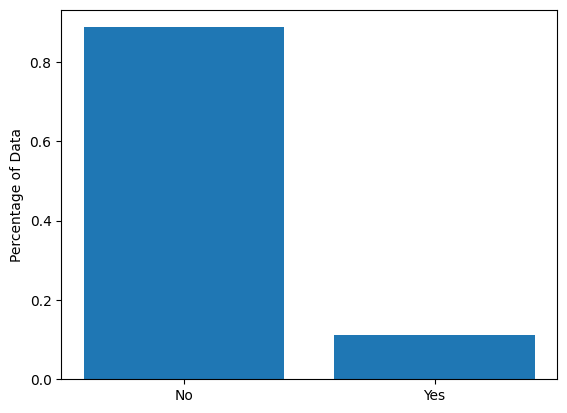

In [9]:
obs = len(y)
plt.bar(["No","Yes"],[len(y[y.yes==0])/obs,len(y[y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()
# imbalanced data

In [10]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)


#1.) Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter

In [11]:
from imblearn.over_sampling import SMOTE


In [13]:

###############
###TRANSFORM###
###############

smote = SMOTE()
X_scaled, y_train = smote.fit_resample(X_scaled, y_train)


# 2.) Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [14]:
dtree_main = DecisionTreeClassifier(max_depth = 3)
dtree_main.fit(X_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'duration <= -0.207\ngini = 0.5\nsamples = 51160\nvalue = [25580, 25580]\nclass = No'),
 Text(0.25, 0.625, 'duration <= -0.499\ngini = 0.279\nsamples = 18834\nvalue = [15676, 3158]\nclass = No'),
 Text(0.125, 0.375, 'month_mar <= 4.161\ngini = 0.112\nsamples = 10397\nvalue = [9777, 620]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.095\nsamples = 10195\nvalue = [9688, 507]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.493\nsamples = 202\nvalue = [89, 113]\nclass = Yes'),
 Text(0.375, 0.375, 'contact_telephone <= 1.32\ngini = 0.421\nsamples = 8437\nvalue = [5899, 2538]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.481\nsamples = 6102\nvalue = [3651, 2451]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.072\nsamples = 2335\nvalue = [2248, 87]\nclass = No'),
 Text(0.75, 0.625, 'contact_telephone <= 1.322\ngini = 0.425\nsamples = 32326\nvalue = [9904, 22422]\nclass = Yes'),
 Text(0.625, 0.375, 'duration <= 0.554\ngini = 0.346\nsamples = 26497\nvalue = [5893, 20604]\nclass =

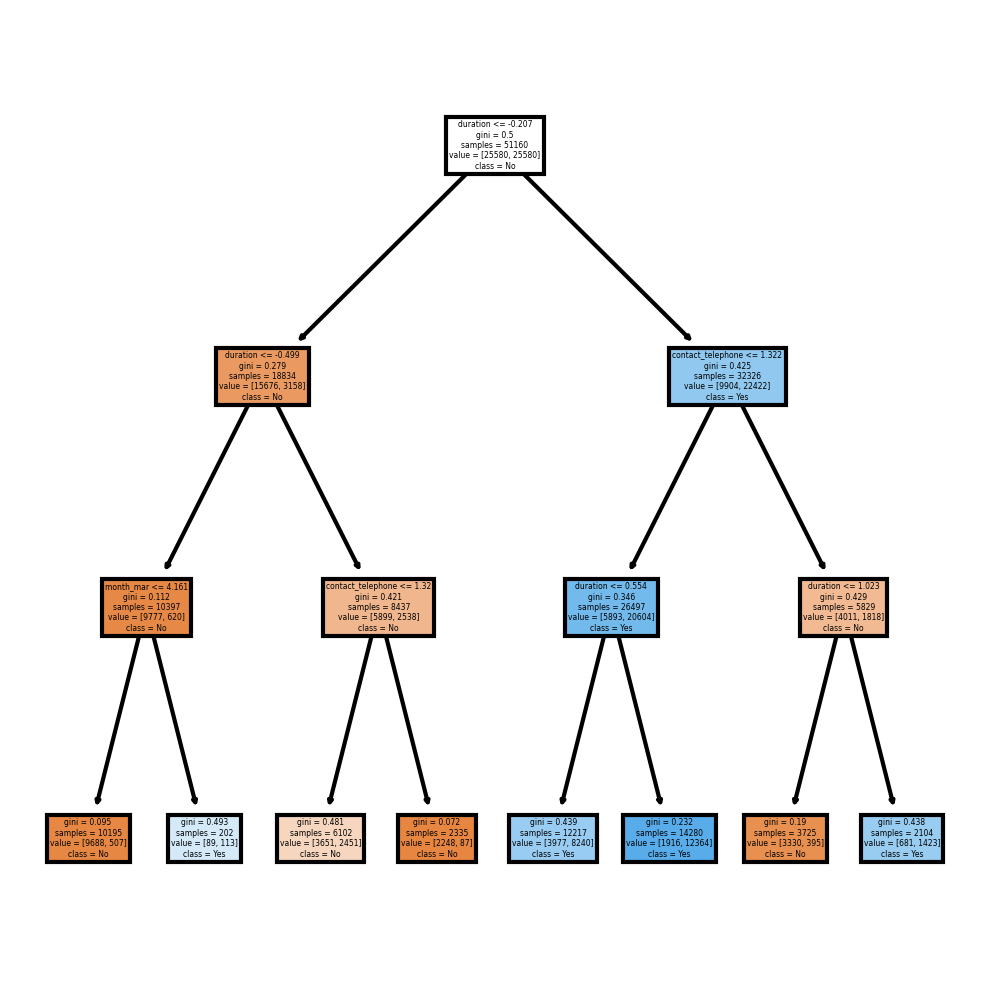

In [15]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dtree_main, filled = True, feature_names = X.columns, class_names=["No","Yes"])


#fig.savefig('imagename.png')

# 1b.) Confusion matrix on out of sample data. Visualize and store as variable

In [16]:
y_pred = dtree_main.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

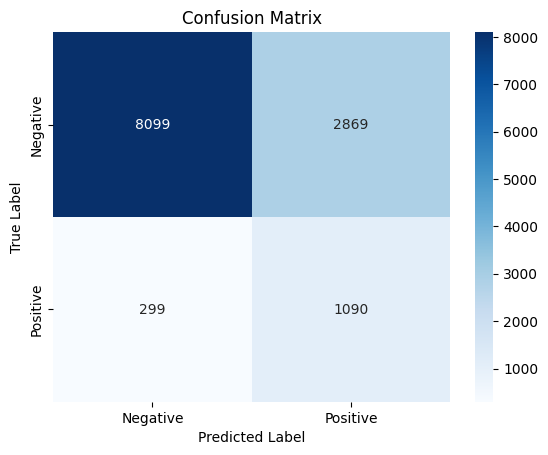

In [17]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3.) Use bagging on your descision tree

In [18]:
# can optimize on Max Depth

# Decision Tree
dtree = DecisionTreeClassifier(max_depth = 3)

In [19]:
bagging = BaggingClassifier(
    estimator = dtree,
    n_estimators = 100,
    max_samples = .5, # can select only less than half of the observations
    max_features = 1 # can select all the features
)

bagging.fit(X_scaled, y_train)

y_pred = bagging.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


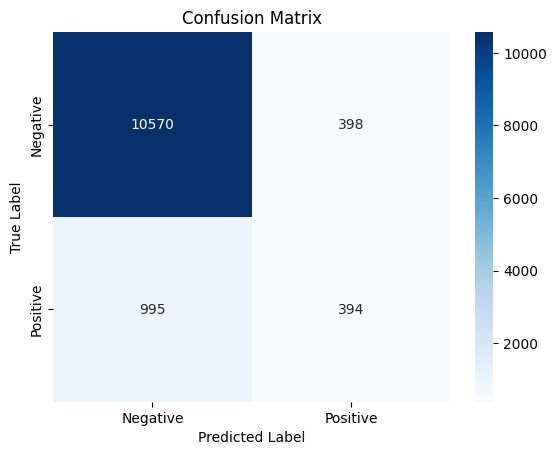

In [20]:
# confusion matrix

y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4.) Boost your tree

In [21]:
from sklearn.ensemble import AdaBoostClassifier

In [22]:
dtree = DecisionTreeClassifier(max_depth = 3)


In [23]:
boost = AdaBoostClassifier(
    estimator = dtree,
    n_estimators = 50
)

boost.fit(X_scaled, y_train)

y_pred = boost.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


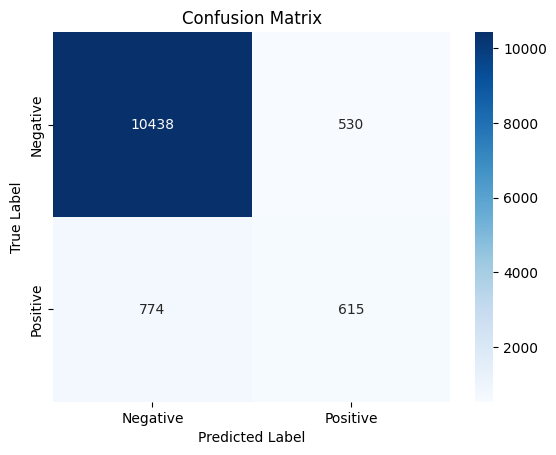

In [24]:
# Confusion Matrix
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 5.) For your meta model, train a Logistic Regression on the Decision Tree, Boosted Tree, and Bagged Tree. Interpret coefficients and significance.

In [16]:
pip install mlens

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 kB 2.4 MB/s eta 0:00:00


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from mlens.ensemble import SuperLearner

In [25]:
from sklearn.linear_model import LogisticRegression

In [28]:
# Assuming bagging, boost, and dtree_main are your base models
predictions = [bagging.predict(X_scaled), boost.predict(X_scaled), dtree_main.predict(X_scaled)]

# Stack predictions horizontally to create a feature matrix for the super learner
# Each model's predictions become a column in the matrix
X_base_learners = np.column_stack(predictions)

# Now fit the super learner
super_learner = LogisticRegression()
super_learner.fit(X_base_learners, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [29]:
super_learner.coef_

array([[1.93882875, 4.00673226, 1.07431671]])

##### Findings
- The coefficients of all three base learners are positive, indicating that the higher values of base learners predictions are associated with the higher probabilities of y being in the positive class.
- Among all the base learners, Boosted Tree has the highest weights with a coefficient of 4.01 in the super learner model, thus having the highest importance in affecting the super learner's prediction. Following Boosted Tree is Bagged Tree with a coefficient of 1.94, which is the second influencial base learner. Decision Tree is the least important base learner with a coefficient of 1.07.

# 6.)